# Определение перспективного тарифа для телеком компании

Цель исследования - на основе данных оператора сотовой связи проанализировать поведение клиентов и определить, какой тариф прибыльнее, с целью корректировки рекламного бюджета.   
Данные содержат информацию о небольшой выборке (500) клиентов двух тарифных планов: «Смарт» и «Ультра». Откуда клиенты, каким тарифом они пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

[1  Изучение общей информации](#1)   
[2  Подготовка данных](#2)    
[3  Анализ и описание данных](#3)   
[4  Проверка гипотез](#4)   
[5  Общий вывод](#5)   

## Изучение общей информации
<a id='1'></a>

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from math import factorial
from scipy.stats import norm
import matplotlib.pyplot as plt 
import math

pd.options.display.max_columns = 50
def info (df):
    display(df.head(10))
    df.info()
    print('')
    print('Процент пропусков в данных:')
    print(df.isna().mean()*100)
    print('-------------------------------------------------------')
    print('')

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

print('Информация о звонках')
info(calls)

print('Информация об интернет-сессиях')
info(internet)

print('Информация о сообщениях')
info(messages)

print('Информация о тарифах')
info(tariffs)

print('Информация о пользователях')
info(users)


Информация о звонках


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Процент пропусков в данных:
id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64
-------------------------------------------------------

Информация об интернет-сессиях


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Процент пропусков в данных:
Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64
-------------------------------------------------------

Информация о сообщениях


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Процент пропусков в данных:
id              0.0
message_date    0.0
user_id         0.0
dtype: float64
-------------------------------------------------------

Информация о тарифах


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Процент пропусков в данных:
messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64
-------------------------------------------------------

Информация о пользователях


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Процент пропусков в данных:
user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64
-------------------------------------------------------



### Вывод

В данных не обнаружено пропусков, не считая отсутствующих значений по дате прекращения пользования тарифом, но это не ошибка и не пропуск. В датасете, содержащим информацию об интернет-сессиях присутствует лишняя колонка, дублирующая индексы. 

## Подготовка данных
<a id='2'></a>

Удалим лишнюю колонку из датасета с информацией об интернет-сессиях.  

Округлим значения минут и мегабайт вверх в соответствии с правилами использования тарифов.  

Заменим во всех столбцах с датами тип на формат даты и добавим в датасеты с информацией о звонках, сообщениях и использовании интернета столбец с названием месяца. 

In [2]:
del internet['Unnamed: 0']

calls['duration'] = calls['duration'].apply(lambda x: int(math.ceil(x)))
internet['mb_used'] = internet['mb_used'].apply(lambda x: int(math.ceil(x)))

def date (data, col):
    data[col] = pd.to_datetime(data[col])
    data['month'] = data[col].dt.month_name() 
    print(data.info())
    display(data.head())
    
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
date(calls, 'call_date')
date(messages, 'message_date')
date(internet, 'session_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.7+ MB
None


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB
None


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.7+ MB
None


,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,November
1,1000_1,1053,2018-09-07,1000,September
2,1000_2,1198,2018-06-25,1000,June
3,1000_3,551,2018-08-22,1000,August
4,1000_4,303,2018-09-24,1000,September


In [3]:
print('Количество минут:', calls['duration'].sum())
print('Количество sms:', messages['id'].count())
print('Количество mb:', internet['mb_used'].sum())

Количество минут: 1450301
Количество sms: 123036
Количество mb: 55369459


Подсчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам, а также количество отправленных сообщений и объем израсходованного интернет-трафика по месяцам путем создания сгруппированных по user_id и месяцу датасетов. 

In [4]:
calls_grouped = calls.groupby(['user_id','month']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls_grouped.columns = ['user_id', 'month','count_calls', 'minutes_used']
print(calls_grouped['minutes_used'].sum())
display(calls_grouped.head(10))

messages_grouped = messages.groupby(['user_id','month'])['id'].agg(['count']).reset_index() 
messages_grouped.columns = ['user_id', 'month', 'count_messages']
print(messages_grouped['count_messages'].sum())
display(messages_grouped.head(10))

internet_grouped = internet.groupby(['user_id','month'])['mb_used'].agg(['sum']).reset_index()
internet_grouped.columns = ['user_id', 'month', 'mb_used']
print(internet_grouped['mb_used'].sum())
display(internet_grouped.head(10))


1450301


,user_id,month,count_calls,minutes_used
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159
5,1000,November,43,338
6,1000,October,57,350
7,1000,September,58,466
8,1001,December,63,414
9,1001,November,59,430


123036


,user_id,month,count_messages
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
5,1000,November,58
6,1000,October,73
7,1000,September,57
8,1002,August,13
9,1002,December,12


55369459


,user_id,month,mb_used
0,1000,August,14070
1,1000,December,9827
2,1000,July,14016
3,1000,June,23257
4,1000,May,2256
5,1000,November,14768
6,1000,October,14717
7,1000,September,14581
8,1001,December,14053
9,1001,November,18452


Теперь полученные таблицы с данными об использовании минут, сообщений и интернета помесячно по каждому пользователю объединим между собой, и далее с данными о пользователях.   
К полученному датасету добавим данные об используемом каждым пользователем тарифе. 

In [5]:
data_calls_messages = calls_grouped.merge(messages_grouped, how='outer',on=['user_id','month'])

data_calls_messages_internet = data_calls_messages.merge(internet_grouped, how='outer',on=['user_id','month'])
                    
data = data_calls_messages_internet.merge(users, how='outer',on=['user_id'])

tariffs['tariff'] = tariffs['tariff_name']

data_tot = data.merge(tariffs, how='left',on=['tariff'])
del data_tot['tariff_name']
display(data_tot)
print('sms',data_tot['count_messages'].sum())
print('min',data_tot['minutes_used'].sum())
print('mb',data_tot['mb_used'].sum())


,user_id,month,count_calls,minutes_used,count_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,52.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,46.0,333.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,47.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,43.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,22.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,November,NaN,NaN,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,October,NaN,NaN,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,September,NaN,NaN,32.0,17232.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


sms 123036.0
min 1450301.0
mb 55369459.0


Используя данные полученной таблицы со сводной информацией, рассчитаем сначала ежемесячные расходы каждого пользователя сверх абонентской платы и потом найдем общую выручку, прибавив их к сумме абонентской платы.   
Выручка сверх суммы абонентской платы за интернет рассчитывается исходя из того, что после исчерпания лимита мегабайтов, входящих в тарифный план, оплата производится сразу за пакет из 1 Гб вне зависимости от того, сколько по итогу будет из него использовано (это не совсем точно понятно из условия; в реальной рабочей ситуации, если из тарифа это явно не следует, необходимо уточнить логику расчета, т.к. суммы могут заметно различаться при разных вариантах).

In [6]:
def add_fee (row):
    calls_add_fee = (row['minutes_used']-row ['minutes_included']) * row['rub_per_minute']
    message_add_fee = (row['count_messages']-row ['messages_included']) * row['rub_per_message']
    internet_add_fee = np.ceil((row['mb_used']-row ['mb_per_month_included'])/1024) * row['rub_per_gb']
    fee = 0
    for i in [calls_add_fee, message_add_fee, internet_add_fee]:
        if i > 0:
            fee += i
    return fee
    
data_tot['rub_add_fee'] = data_tot.apply(add_fee, axis=1)
data_tot['total_revenue'] = data_tot['rub_add_fee'] + data_tot['rub_monthly_fee']
data_tot

,user_id,month,count_calls,minutes_used,count_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_add_fee,total_revenue
0,1000,August,52.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,December,46.0,333.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,July,47.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,June,43.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,May,22.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,November,NaN,NaN,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,600.0,1150.0
3212,1489,October,NaN,NaN,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1000.0,1550.0
3213,1489,September,NaN,NaN,32.0,17232.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,400.0,950.0
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


### Вывод

В результате группировки датасетов с информацией о звонках, сообщениях и интернет-сессиях по пользователям и месяцам были получены данные о каждом пользователе помесячно. После объединения новых таблиц с данными о пользователях и тарифах получена большая сводная таблица, на основании которой рассчитана помесячная выручка с каждого пользователя. 

## Анализ и описание данных
<a id='3'></a>

На основании созданной большой сводной таблицы создадим таблицы с данными по расходу минут, смс и интернет-трафика для каждого тарифа помесячно по каждому пользователю. 

In [7]:
df = data_tot.groupby(['tariff','user_id','month'])[['minutes_used','count_messages','mb_used']].agg('sum').reset_index()
df.columns = ['tariff','user_id','month','minutes_used','count_messages','mb_used']
df_smart = df.query('tariff == "smart"').copy()
df_ultra = df.query('tariff == "ultra"').reset_index(drop=True).copy()
display(df_smart)
display(df_ultra)

,tariff,user_id,month,minutes_used,count_messages,mb_used
0,smart,1001,December,414.0,0.0,14053.0
1,smart,1001,November,430.0,0.0,18452.0
2,smart,1002,August,289.0,13.0,20347.0
3,smart,1002,December,236.0,12.0,18137.0
4,smart,1002,July,214.0,11.0,17601.0
...,...,...,...,...,...,...
2224,smart,1498,September,471.0,44.0,22166.0
2225,smart,1499,December,492.0,66.0,13077.0
2226,smart,1499,November,612.0,59.0,17984.0
2227,smart,1499,October,449.0,48.0,17809.0


,tariff,user_id,month,minutes_used,count_messages,mb_used
0,ultra,1000,August,408.0,81.0,14070.0
1,ultra,1000,December,333.0,70.0,9827.0
2,ultra,1000,July,340.0,75.0,14016.0
3,ultra,1000,June,172.0,60.0,23257.0
4,ultra,1000,May,159.0,22.0,2256.0
...,...,...,...,...,...,...
980,ultra,1495,August,92.0,13.0,2616.0
981,ultra,1495,December,1031.0,84.0,23450.0
982,ultra,1495,November,954.0,79.0,38972.0
983,ultra,1495,October,1030.0,82.0,29393.0


-------------Звонки-------------

-------------Тариф Смарт-------------
count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: minutes_used, dtype: float64

Дисперсия: 36219.31578434428


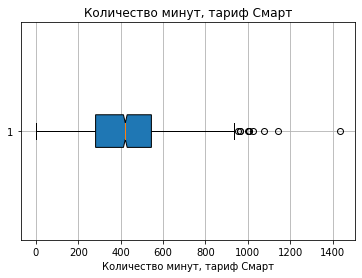

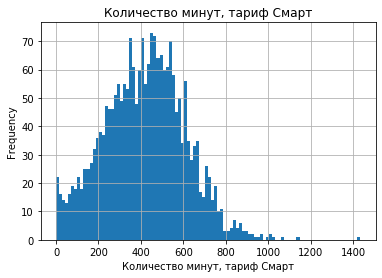

-------------Тариф Ультра-------------
count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: minutes_used, dtype: float64

Дисперсия: 100873.63339730098


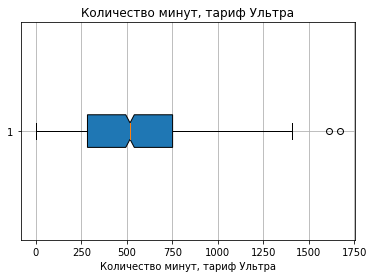

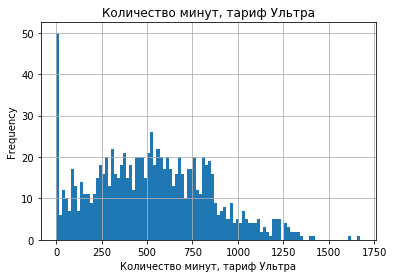

-------------Сообщения-------------

-------------Тариф Смарт-------------
count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages, dtype: float64

Дисперсия: 796.8129584480083


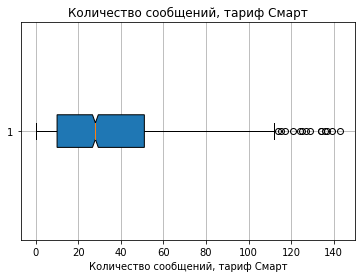

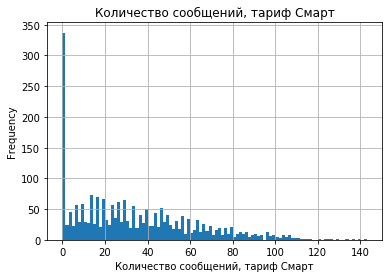

-------------Тариф Ультра-------------
count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: count_messages, dtype: float64

Дисперсия: 2285.2661425446736


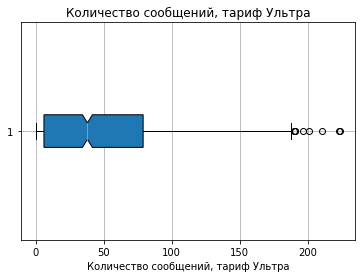

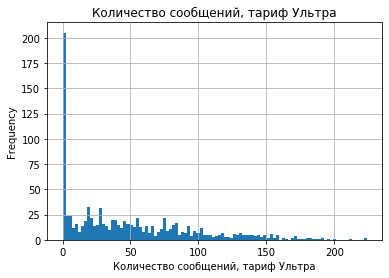

-------------Интернет-------------

-------------Тариф Смарт-------------
count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

Дисперсия: 34545911.12695752


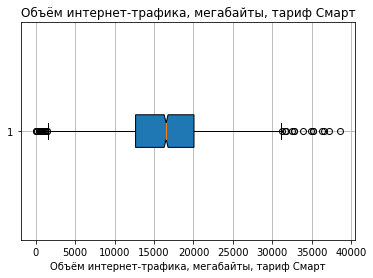

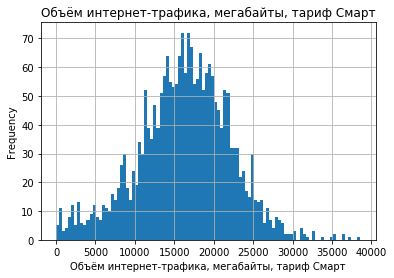

-------------Тариф Ультра-------------
count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

Дисперсия: 101935621.04821923


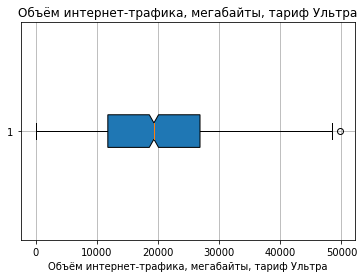

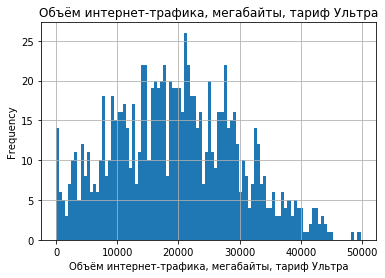

In [8]:
def des(df, column, title):
    print(df[column].describe())
    print('')  
    variance = np.var(df[column], ddof=1)
    print('Дисперсия:', variance)
    plt.boxplot(df[column], 
            notch=True, 
            sym='o', 
            vert=False,
            patch_artist = True)
    plt.title(title)
    plt.xlabel(title)
    plt.grid()
    plt.show()
    hist = df[column].plot(kind='hist', bins=100)
    plt.title(title)
    plt.xlabel(title)
    plt.grid()
    plt.show()

print('-------------Звонки-------------')  
print('')  
print('-------------Тариф Смарт-------------')
des(df_smart,'minutes_used', 'Количество минут, тариф Смарт')
print('-------------Тариф Ультра-------------')
des(df_ultra,'minutes_used', 'Количество минут, тариф Ультра')
print('-------------Сообщения-------------')   
print('') 
print('-------------Тариф Смарт-------------')
des(df_smart,'count_messages', 'Количество сообщений, тариф Смарт')
print('-------------Тариф Ультра-------------')
des(df_ultra,'count_messages', 'Количество сообщений, тариф Ультра')
print('-------------Интернет-------------')   
print('') 
print('-------------Тариф Смарт-------------')
des(df_smart,'mb_used', 'Объём интернет-трафика, мегабайты, тариф Смарт')
print('-------------Тариф Ультра-------------')
des(df_ultra,'mb_used', 'Объём интернет-трафика, мегабайты, тариф Ультра')


### Вывод

Пользователи тарифа Смарт в среднем в месяц разговаривают 418 минут, стандартное отклонение составляет 190 минут, медианное значение равно 422 минуты, что немного больше среднего. Значения используемых минут на тарифе Смарт распределены нормально, с незначительной скошенностью влево и небольшим количеством выбросов свыше 900 минут.   
Пользователи тарифа Ультра в месяц разговаривают больше, чем пользователи тарифа Смарт, а именно 526 минут в среднем, разброс величин для данного тарифа больше - стандартное отклонение составляет 317 минут. Медиана немного меньше среднего и равна 518 минут. Много значений расположено около нуля. Распределение минут для тарифа Ультра нормальное, с небольшой скошенностью вправо и редкими выбросами свыше 1300 минут.   

Пользователи тарифа Смарт отправляют в среднем 33 сообщения в месяц, при этом стандартное отклонение составляет 28 сообщений, также как и медиана. Максимальное значение - 143 сообщения в месяц. Датасет немного скошен вправо и содержит небольшое количество выбросов больше 110 сообщений.   
Пользователи тарифа Ультра отправляют в среднем 49 сообщения в месяц, стандартное отклонение составляет почти 48 сообщений, медиана - 38. Максимальное значение - 224 сообщения в месяц. Датасет скошен вправо и содержит небольшое количество выбросов больше 180 сообщений.   
Для обоих тарифов велика доля нулевых значений.  

Пользователи тарифа Смарт используют в среднем 16229 мегабайт (почти 16 Гб) в месяц. Стандартное отклонение составляет 5877 Мб, медианное значение чуть больше среднего и равно 16531 Мб. Распределение используемого интернет-трафика на тарифе Смарт нормальное, с незначительной скошенностью влево и с выбросами меньше 2000 Мб и больше 31000 Мб.  
Пользователи тарифа Ультра используют в среднем 19487 мегабайт (19 Гб) в месяц. Разброс значений на данном тарифе намного больше - стандартное отклонение составляет 10096 Мб, медианное значение чуть меньше среднего и равно 19324 Мб. Распределение используемого интернет-трафика на тарифе Ультра нормальное, с незначительной скошенностью вправо и с единичными выбросами свыше 48000 Мб. 

Ожидаемо пользователи тарифа Ультра используют больше минут, сообщений и интернет-трафика, чем пользователи тарифа Смарт. 

## Проверка гипотез
<a id='4'></a>

In [9]:
print('Средняя выручка на тарифе Смарт:', round(data_tot.loc[data_tot['tariff'] == 'smart']['total_revenue'].mean(),2))
print('Средняя выручка на тарифе Ультра:', round(data_tot.loc[data_tot['tariff'] == 'ultra']['total_revenue'].mean(),2))

Средняя выручка на тарифе Смарт: 1294.31
Средняя выручка на тарифе Ультра: 2070.94


Проверим гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт». 
Критический уровень статистической значимости зададим значением 0.05.
Параметр equal_var, задающий, считать ли равными дисперсии генеральных совокупностей, из которых были сформированы выборки, укажем как False, т.к. дисперсии выборок по тарифам сильно различаются.

In [10]:
alpha = 0.05  

results = st.ttest_ind(data_tot.loc[data_tot['tariff'] == 'smart']['total_revenue'].values, data_tot.loc[data_tot['tariff'] == 'ultra']['total_revenue'].values, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается и полученное значение p-value говорит о том, что такое различие между выручкой на тарифах не случайно.

In [11]:
print('Средняя выручка пользователей из Москвы:', round(data_tot.loc[data_tot['city'] == 'Москва']['total_revenue'].mean(),2))
print('Средняя выручка пользователей из других регионов:', round(data_tot.loc[data_tot['city'] != 'Москва']['total_revenue'].mean(),2))

Средняя выручка пользователей из Москвы: 1550.81
Средняя выручка пользователей из других регионов: 1528.1


Проверим гипотезу о равенстве средней выручки пользователей из Москвы и из других регионов.
Критический уровень статистической значимости зададим значением 0.05.

In [12]:
alpha = 0.05  

results = st.ttest_ind(data_tot.loc[data_tot['city'] == 'Москва']['total_revenue'].values, data_tot.loc[data_tot['city'] != 'Москва']['total_revenue'].values, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей из Москвы примерно равна средней выручке пользователей из других регионов и полученное значение p-value подтверждает, что с высокой вероятностью в примерно 50% различие между выручкой пользователей из Москвы и других городов можно получить случайно. 

### Вывод

Гипотеза о равенстве средней выручки пользователей тарифов Ультра и Смарт не подтвердилась.
Гипотезу о равенстве средней выручки пользователей из Москвы и из других регионов отвергнуть не получилось. 

## Общий вывод
<a id='5'></a>

Пользователи тарифа Ультра используют больше минут, интернет-трафика и посылают больше сообщений, чем пользователи тарифа Смарт. Средняя выручка, которую приносит один пользователь тарифа Ультра составляет 2070.94 руб., тарифа Смарт - 1294.31 руб. Таким образом, средняя выручка по тарифу Ультра выше и это не случайность, при этом дополнительная выручка сверх абонентской платы небольшая. На тарифе Смарт средняя выручка сверх абонентской платы более чем в два раза выше суммы абонентской платы.  
Тариф Ультра приносит больше денег в среднем, но общая выручка по тарифу Смарт выше (2886301 руб. против 2041950 руб.) за счет большего количества пользователей (341 против 194).
Таким образом, несмотря на более высокую среднюю выручку тарифа Ультра, тариф Смарт более популярный и в целом приносит больше дохода. При этом цена тарифов и их объем пакета услуг сильно различаются и, скорее всего, в целом данные тарифы интересны разной целевой аудитории, поэтому утверждать, что какой-то из них лучше и выгоднее, сложно. 